# Lab Assessment 3

In [1]:
# Write your name:Alhanouf Aldossary
# Write your ID: 442003417

In [2]:
import sklearn
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [3]:
from sklearn.svm import SVC

### Load data 

In [4]:
data = pd.read_csv("diabetes.csv")

### Set your features and output 

In [5]:
data

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
data.shape

(768, 9)

In [7]:
# Setting the X (features) and Y (label/output/target)
X = data.iloc[:,0:8].values
Y = data.iloc[:,8].values

### Using Hold Out

In [8]:
# Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state=42, stratify=Y) 

In [9]:
# Fit DecisionTreeClassifier() model with training data
model = SVC()
model.fit(X_train, y_train) # fit to train the model

SVC()

In [10]:
# Make predictions for test data
y_pred = model.predict(X_test) # just X and only x

In [11]:
# Print training and testing accuracy
print('Training Accuracy : {:.3f}'.format(model.score(X_train, y_train)))
print('Test Accuracy : {:.3f}'.format(model.score(X_test, y_test))) # to get the accuracy
# the diff between them is more than 10 so that make the overfitting or underfitting (Rule of themp)
# the output is good not under or overfitting

Training Accuracy : 0.776
Test Accuracy : 0.744


### Using Data Preprocessing

In [12]:
# Normalize your data using preprocessing.MinMaxScaler()
mm_scaler = preprocessing.MinMaxScaler()
X_mm = mm_scaler.fit_transform(X)
#MinMaxScaler is a normalization technique that scales the data to a fixed range, typically between 0 and 1.
# just process the x, cuz Y is the target is already 0 ,1 

In [13]:
# Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_mm, Y, test_size = 0.4, random_state=42, stratify=Y) 

In [14]:
# Fit model with training data
model = SVC()
model.fit(X_train, y_train)

SVC()

In [15]:
# Make predictions for test data
y_pred = model.predict(X_test)

In [16]:
# Print training and testing accuracy
print('Training Accuracy : {:.3f}'.format(model.score(X_train, y_train)))
print('Test Accuracy : {:.3f}'.format(model.score(X_test, y_test)))
# diffrernt between trainnig and testing by 10%; underfitting
#yes, normalaztion increace the accuracy

Training Accuracy : 0.817
Test Accuracy : 0.750


###  Optimization

In [17]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score 

In [18]:
# Set the parameters
param_grid = {'max_depth': [2, 3, 5, 10, 15], 'criterion': ['gini', 'entropy']}


In [19]:
# Build your GridSearchCV with the parameters' setting

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10)

In [20]:
# Split data into train+validation set and test set 

# first! no touch the test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X_mm, Y, test_size = 0.4, random_state=42, stratify=Y)

In [21]:
# Split train+validation set into training and validation sets 

# seconde!
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=42)
print("Size of training set: {} size of validation set: {} size of test set:"
" {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

Size of training set: 345 size of validation set: 115 size of test set: 308



In [22]:
# Train your GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 15]})

In [23]:
# Print the best parameters
print("Best parameters: {}".format(grid_search.best_params_))

Best parameters: {'criterion': 'entropy', 'max_depth': 3}


In [24]:
# Print the best score on cross-validation
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best cross-validation score: 0.76


In [25]:
print("Best estimator:\n{}".format(grid_search.best_estimator_)) # the output shows ....

Best estimator:
DecisionTreeClassifier(criterion='entropy', max_depth=3)


In [26]:
# Rebuild a model with the best parameters on the combined training and validation set, 
# and evaluate it on the test set

svm = grid_search.best_estimator_
svm.fit(X_trainval, y_trainval)# first split!
y_pred = svm.predict(X_test)
training_score = svm.score(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

print("Best score on validation set: {:.2f}".format(grid_search.best_score_)) 
print("Best parameters: ", grid_search.best_params_)

Best score on validation set: 0.76
Best parameters:  {'criterion': 'entropy', 'max_depth': 3}


In [27]:
# Print training and testing accuracy

print("Training set score with best parameters: {:.2f}".format(training_score))
print("Test set score with best parameters: {:.2f}".format(test_score))
# no, it not overfitting; because the overfitting must have diffrent
# between the tranning and testing by 10%, where the test is the higest.

Training set score with best parameters: 0.79
Test set score with best parameters: 0.73


### Visualize the confusion matrix for the best model 

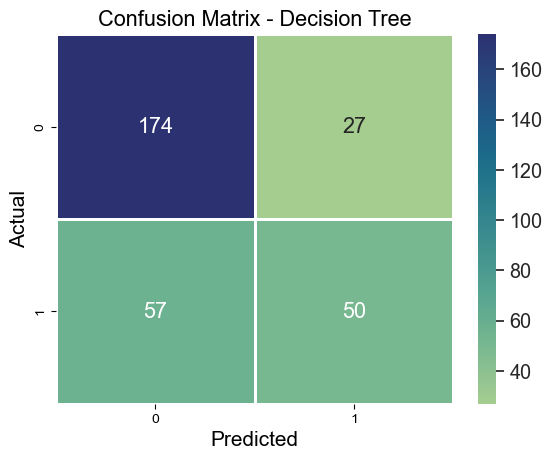

<Figure size 1000x700 with 0 Axes>

In [28]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Fill in the parameters for confusion_matrix function <-----------
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)# <------------error here

matrix_df = pd.DataFrame(confusion_matrix)

ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="crest", linewidth=2)

ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted", fontsize =15)
ax.set_ylabel("Actual", fontsize=15)

# Print the graph
plt.show()